In [103]:
#configuration
import os
import torch # PyTorch is an open source machine learning (ML) framework based on the Python programming language and the Torch library.
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
from matplotlib import style 
import seaborn as sns
from textwrap import wrap
import seaborn as sns
import matplotlib.pyplot as plt
import re
import whois
import datetime
import matplotlib.pyplot as plt
from colorama import Fore
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld
import math

In [104]:
import pandas as pd
file_path = '/home/roy/Documents/last year/cyber/data.csv'
df = pd.read_csv(file_path)


In [105]:
#determine whether a CUDA-enabled GPU is available and set the device accordingly.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [106]:
df

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad
...,...,...
420459,23.227.196.215/,bad
420460,apple-checker.org/,bad
420461,apple-iclods.org/,bad
420462,apple-uptoday.org/,bad


In [107]:
df['label'].value_counts()

label
good    344821
bad      75643
Name: count, dtype: int64

In [108]:
'''
in the first step we need to do Data Preprocessing //need to do more
'''
df.drop_duplicates(subset=['url'], keep='first', inplace=True)

In [109]:

df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work
df

/tmp/ipykernel_17196/2035965311.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'good': 1, 'bad': 0}) #for more complex work


,url,label
0,diaryofagameaddict.com,0
1,espdesign.com.au,0
2,iamagameaddict.com,0
3,kalantzis.net,0
4,slightlyoffcenter.net,0
...,...,...
420459,23.227.196.215/,0
420460,apple-checker.org/,0
420461,apple-iclods.org/,0
420462,apple-uptoday.org/,0


In [110]:

# Function to check if a URL uses an IP address
def uses_ip_address(url):
    ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
    return bool(ip_pattern.match(url))
    
def lengthurl(url):
    return len(url)

def countletters(url):
    count = 0
    for char in url:
        if char.isalpha():
            count += 1
    return count
    
def count_digits(url):
    count = 0
    for char in url:
        if char.isdigit():
            count += 1
    return count

def numberDots(url):
    count =0
    for char in url:
        if char=='.':
            count+=1

    return count

def numberHyphen(url):
    count =0
    for char in url:
        if char=='-':
            count+=1

    return count

def numberBackSlash(url):
    count =0
    for char in url:
        if char=='/':
            count+=1

    return count

def count_letter_digit_letter(url):
    pattern = re.compile(r'[a-zA-Z]\d+[a-zA-Z]')
    occurrences = len(re.findall(pattern, url))
    return occurrences


def count_digit_letter_digit(url):
    pattern = re.compile(r'\d+[a-zA-Z]\d+')
    occurrences = len(re.findall(pattern, url))
    return occurrences

# Function to count delimiters and find the longest word length
def analyze_delimiters_and_longest_word(url):
    delimiters_count = {}
    longest_word_length = 0
    
    # Define delimiters as any non-alphanumeric characters
    delimiters = re.compile(r'[^a-zA-Z0-9]+')
    components = re.split(delimiters, url)
    
    # Iterate over the components
    for component in components:
        # Count delimiters in each component
        delimiters_count[component] = len(re.findall(delimiters, component))
        
        # Find the longest word length
        if len(component) > longest_word_length:
            longest_word_length = len(component)
    
    return delimiters_count, longest_word_length

def check_domain_reputation(domain):
    known_malicious_domains = ['maliciousdomain1.com', 'maliciousdomain2.net']  # need to add more
    if domain in known_malicious_domains:
        return True
    else:
        return False
        

def has_suspicious_keywords(url):
    suspicious_keywords = ['phishing', 'malware', 'scam']  # Add more 
    for keyword in suspicious_keywords:
        if keyword in url:
            return True
    return False
    
def has_subdomains(url):
    if len(url.split('.')) > 2:
        return 1
    else:
        return 0
    
def analyze_whois(domain):
    try:
        domain_info = whois.whois(domain)
        # You would analyze the WHOIS information here and return True/False based on some criteria
        # For simplicity, let's just return True if we get WHOIS information without errors
        return 1
    except:
        return 0

def httpSecure(url):
    htp = urlparse(url).scheme
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0

def number_rate(url):
    # Count occurrences of digits
    digit_count = sum(1 for char in url if char.isdigit())
    
    # Compute number rate
    rate = digit_count / len(url) if len(url) > 0 else 0
    
    return rate

def alphabet_entropy(url):
    # Count occurrences of each letter
    letter_counts = {chr(i): 0 for i in range(ord('a'), ord('z') + 1)}
    total_letters = 0
    
    for char in url.lower():
        if 'a' <= char <= 'z':  # Check if char is a lowercase English letter
            letter_counts[char] += 1
            total_letters += 1
    
    # Compute probabilities and entropy
    entropy = 0
    for count in letter_counts.values():
        if count > 0:
            probability = count / total_letters
            entropy -= probability * math.log2(probability)
    
    return entropy


df['https'] = df['url'].apply(lambda i: httpSecure(i))
df['uses_ip'] = df['url'].apply(uses_ip_address)
df['count_digits'] = df['url'].apply(count_digits)
df['count_letters'] = df['url'].apply(countletters)
df['length'] = df['url'].apply(lengthurl)
df['letter_digit_letter_count'] = df['url'].apply(count_letter_digit_letter)
df['digit_letter_digit_count'] = df['url'].apply(count_digit_letter_digit)
df['delimiters_count'], df['longest_word_length'] = zip(*df['url'].apply(analyze_delimiters_and_longest_word))
df['domain_reputation'] = df['url'].apply(check_domain_reputation) #
df['has_suspicious_keywords'] = df['url'].apply(has_suspicious_keywords)
df['has_subdomains'] = df['url'].apply(has_subdomains)
df['whois_info'] = df['url'].apply(analyze_whois) #
df['numberDots'] = df['url'].apply(numberDots) 
df['numberHyphen'] = df['url'].apply(numberHyphen) 
df['numberBackSlash'] = df['url'].apply(numberBackSlash) 
df['number_rate'] = df['url'].apply(number_rate)
df['alphabet_entropy'] = df['url'].apply(alphabet_entropy)

In [111]:



# Applying the functions to each URL component





In [112]:
df

,url,label,https,uses_ip,count_digits,count_letters,length,letter_digit_letter_count,digit_letter_digit_count,delimiters_count,longest_word_length,domain_reputation,has_suspicious_keywords,has_subdomains,whois_info,numberDots,numberHyphen,numberBackSlash,number_rate,alphabet_entropy
0,diaryofagameaddict.com,0,0,False,0,21,22,0,0,"{'diaryofagameaddict': 0, 'com': 0}",18,False,False,0,0,1,0,0,0.000000,3.403989
1,espdesign.com.au,0,0,False,0,14,16,0,0,"{'espdesign': 0, 'com': 0, 'au': 0}",9,False,False,1,0,2,0,0,0.000000,3.521641
2,iamagameaddict.com,0,0,False,0,17,18,0,0,"{'iamagameaddict': 0, 'com': 0}",14,False,False,0,0,1,0,0,0.000000,2.984234
3,kalantzis.net,0,0,False,0,12,13,0,0,"{'kalantzis': 0, 'net': 0}",9,False,False,0,0,1,0,0,0.000000,3.084963
4,slightlyoffcenter.net,0,0,False,0,20,21,0,0,"{'slightlyoffcenter': 0, 'net': 0}",17,False,False,0,0,1,0,0,0.000000,3.546439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420459,23.227.196.215/,0,0,True,11,0,15,0,0,"{'23': 0, '227': 0, '196': 0, '215': 0, '': 0}",3,False,False,1,0,3,0,1,0.733333,0.000000
420460,apple-checker.org/,0,0,False,0,15,18,0,0,"{'apple': 0, 'checker': 0, 'org': 0, '': 0}",7,False,False,0,0,1,1,1,0.000000,3.189898
420461,apple-iclods.org/,0,0,False,0,14,17,0,0,"{'apple': 0, 'iclods': 0, 'org': 0, '': 0}",6,False,False,0,0,1,1,1,0.000000,3.378783
420462,apple-uptoday.org/,0,0,False,0,15,18,0,0,"{'apple': 0, 'uptoday': 0, 'org': 0, '': 0}",7,False,False,0,0,1,1,1,0.000000,3.323231


In [113]:
'''
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='https', hue='label')
plt.title('HTTPS Usage by Label')
plt.xlabel('HTTPS')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='count_digits', hue='label')
plt.title('digits Usage by Label')
plt.xlabel('digits')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='length', hue='label')
plt.title('length Usage by Label')
plt.xlabel('length')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='letter_digit_letter_count', hue='label')
plt.title('letter_digit_letter_count Usage by Label')
plt.xlabel('letter_digit_letter')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='digit_letter_digit_count', hue='label')
plt.title('digit_letter_digit Usage by Label')
plt.xlabel('digit_letter_digit')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='longest_word_length', hue='label')
plt.title('longest_word_length Usage by Label')
plt.xlabel('longest_word_length')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='has_subdomains', hue='label')
plt.title('has_subdomains Usage by Label')
plt.xlabel('has_subdomains')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='numberDots', hue='label')
plt.title('numberDots Usage by Label')
plt.xlabel('numberDots')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='numberHyphen', hue='label')
plt.title('numberHyphen Usage by Label')
plt.xlabel('numberHyphen')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='numberBackSlash', hue='label')
plt.title('numberBackSlash Usage by Label')
plt.xlabel('numberBackSlash')
plt.ylabel('Count')
plt.legend(title='Label', labels=['0', '1'])
plt.show()
'''

"\nimport seaborn as sns\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='https', hue='label')\nplt.title('HTTPS Usage by Label')\nplt.xlabel('HTTPS')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='count_digits', hue='label')\nplt.title('digits Usage by Label')\nplt.xlabel('digits')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='length', hue='label')\nplt.title('length Usage by Label')\nplt.xlabel('length')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 6))\nsns.countplot(data=df, x='letter_digit_letter_count', hue='label')\nplt.title('letter_digit_letter_count Usage by Label')\nplt.xlabel('letter_digit_letter')\nplt.ylabel('Count')\nplt.legend(title='Label', labels=['0', '1'])\nplt.show()\n\nplt.figure(figsize=(8, 

In [114]:
from urllib.parse import urlparse

# Function to check if the domain name is an IP address
def uses_ip_address(url):
    domain = urlparse(url).hostname
    if domain:
        ip_pattern = re.compile(r'\b(?:\d{1,3}\.){3}\d{1,3}\b')
        return bool(ip_pattern.match(domain))
    return False

# Function to check if the port number is the default HTTP port (80)
def uses_default_port(url):
    parsed_url = urlparse(url)
    port = parsed_url.port
    if not port:  # If port is not specified in the URL
        return True  # Default to port 80
    return port == 80  # Compare port to default HTTP port

# Add columns for IP address usage and default port usage
df['uses_ip_address'] = df['url'].apply(uses_ip_address)
df['uses_default_port'] = df['url'].apply(uses_default_port)


In [117]:
'''
import re
from urllib.parse import urlparse
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

df_copy = df.copy()
tokenizer = Tokenizer(filters='', char_level=True, lower=False, oov_token=1)

# Fit only on training data
tokenizer.fit_on_texts(df_copy['url'])
n_char = len(tokenizer.word_index.keys())

train_seq = tokenizer.texts_to_sequences(df_copy['url'])
val_seq = tokenizer.texts_to_sequences(df_copy['url'])

print('Before tokenization: ')
print(df_copy.iloc[0]['url'])
print('\nAfter tokenization: ')
print(train_seq[0])

# Each URL has a different length, therefore padding is needed to equalize each URL length.
# Next step we will do padding on URL column that was just tokenized
sequence_length = np.array([len(i) for i in train_seq])
sequence_length = np.percentile(sequence_length, 99).astype(int)
print(f'Before padding: \n {train_seq[0]}')
train_seq = pad_sequences(train_seq, padding='post', maxlen=sequence_length)
val_seq = pad_sequences(val_seq, padding='post', maxlen=sequence_length)
print(f'After padding: \n {train_seq[0]}')

# Now let's tokenize the other columns
unique_value = {}
for feature in ['uses_ip', 'count_letters', 'length', 'count_digits', 'number_rate', 'alphabet_entropy',
                'uses_ip_address', 'uses_default_port', 'letter_digit_letter_count', 'digit_letter_digit_count',
                'longest_word_length', 'domain_reputation', 'has_suspicious_keywords', 'has_subdomains',
                'https', 'numberDots', 'numberHyphen', 'numberBackSlash']:
    # Get unique value
    label_index = {label: index for index, label in enumerate(df_copy[feature].unique())}

    # Add unknown label in last index
    label_index['<unknown>'] = list(label_index.values())[-1] + 1

    # Count unique value
    unique_value[feature] = label_index['<unknown>']

    # Encode
    df_copy.loc[:, feature] = df_copy.loc[:, feature].apply(lambda val: label_index[val] if val in label_index else label_index['<unknown>'])
    df.loc[:, feature] = df.loc[:, feature].apply(lambda val: label_index[val] if val in label_index else label_index['<unknown>'])

df_copy.head()3

for df_copy in [df_copy, df]:
    data.loc[:, 'label'] = [0 if i == 'good' else 1 for i in data.loc[:, 'label']]
    
df_copy.head()
'''

"\nimport re\nfrom urllib.parse import urlparse\nfrom keras.preprocessing.text import Tokenizer\nfrom keras.preprocessing.sequence import pad_sequences\nimport numpy as np\n\ndf_copy = df.copy()\ntokenizer = Tokenizer(filters='', char_level=True, lower=False, oov_token=1)\n\n# Fit only on training data\ntokenizer.fit_on_texts(df_copy['url'])\nn_char = len(tokenizer.word_index.keys())\n\ntrain_seq = tokenizer.texts_to_sequences(df_copy['url'])\nval_seq = tokenizer.texts_to_sequences(df_copy['url'])\n\nprint('Before tokenization: ')\nprint(df_copy.iloc[0]['url'])\nprint('\nAfter tokenization: ')\nprint(train_seq[0])\n\n# Each URL has a different length, therefore padding is needed to equalize each URL length.\n# Next step we will do padding on URL column that was just tokenized\nsequence_length = np.array([len(i) for i in train_seq])\nsequence_length = np.percentile(sequence_length, 99).astype(int)\nprint(f'Before padding: \n {train_seq[0]}')\ntrain_seq = pad_sequences(train_seq, padding

Accuracy: 0.8692279635258359
Train Loss: 0.34323456411374786
Test Loss: 0.34251608439542935
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.25      0.38     19956
           1       0.87      0.99      0.93    103419

    accuracy                           0.87    123375
   macro avg       0.84      0.62      0.65    123375
weighted avg       0.86      0.87      0.84    123375

Class-wise Metrics:
              precision    recall  f1-score        support
0              0.816705  0.246943  0.379223   19956.000000
1              0.871929  0.989306  0.926916  103419.000000
accuracy       0.869228  0.869228  0.869228       0.869228
macro avg      0.844317  0.618124  0.653069  123375.000000
weighted avg   0.862996  0.869228  0.838326  123375.000000


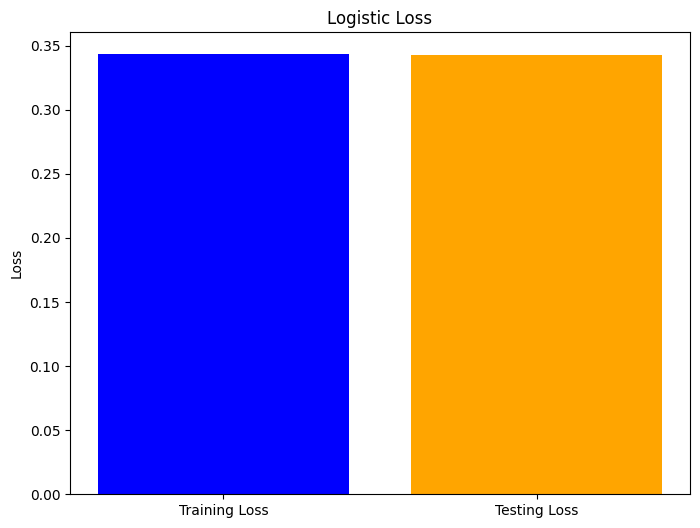

In [126]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Define features (X) and target variable (y)
X = df[[ 'uses_ip','count_letters', 'length', 'count_digits','number_rate','alphabet_entropy','uses_ip_address','uses_default_port','longest_word_length',
        'letter_digit_letter_count', 'digit_letter_digit_count',  
         'has_suspicious_keywords',
         'has_subdomains','numberDots','numberHyphen','numberBackSlash']]
y = df['label']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
model = LogisticRegression(max_iter=2000, random_state=42)
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
train_loss = log_loss(y_train, model.predict_proba(X_train_imputed))
test_loss = log_loss(y_test, model.predict_proba(X_test_imputed))
print("Train Loss:", train_loss)
print("Test Loss:", test_loss)
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)
class_report_df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()
print("Class-wise Metrics:")
print(class_report_df)
loss_values = [train_loss, test_loss]
labels = ['Training Loss', 'Testing Loss']

plt.figure(figsize=(8, 6))
plt.bar(labels, loss_values, color=['blue', 'orange'])
plt.title('Logistic Loss')
plt.ylabel('Loss')
plt.show()


Epoch 1/5
17992/17992 [==============================] - 36s 2ms/step - loss: 0.3498 - accuracy: 0.8726 - val_loss: 0.3204 - val_accuracy: 0.8830
Epoch 2/5
17992/17992 [==============================] - 36s 2ms/step - loss: 0.3251 - accuracy: 0.8814 - val_loss: 0.3151 - val_accuracy: 0.8841
Epoch 3/5
17992/17992 [==============================] - 36s 2ms/step - loss: 0.3200 - accuracy: 0.8824 - val_loss: 0.3184 - val_accuracy: 0.8828
Epoch 4/5
17992/17992 [==============================] - 36s 2ms/step - loss: 0.3171 - accuracy: 0.8831 - val_loss: 0.3131 - val_accuracy: 0.8856
Epoch 5/5
3856/3856 [==============================] - 4s 936us/step
Train Error: 0.11442585593597154
Validation Error: 0.11418844984802434


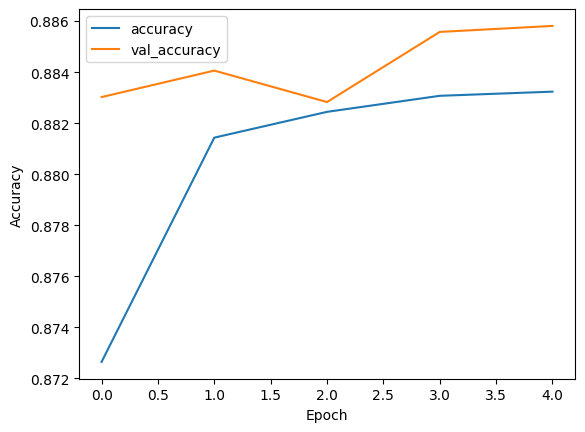

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, MaxPooling1D
X = df[[ 'uses_ip','count_letters', 'length', 'count_digits','number_rate','alphabet_entropy','uses_ip_address','uses_default_port','longest_word_length',
        'letter_digit_letter_count', 'digit_letter_digit_count',  
         'has_suspicious_keywords',
         'has_subdomains','numberDots','numberHyphen','numberBackSlash']]
y = df['label']  

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
imputer = SimpleImputer(strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)  # Impute validation data, do not fit again
X_train_cnn = X_train_imputed.reshape(X_train_imputed.shape[0], X_train_imputed.shape[1], 1)
X_valid_cnn = X_valid_imputed.reshape(X_valid_imputed.shape[0], X_valid_imputed.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train, epochs=5, batch_size=16, validation_data=(X_valid_cnn, y_valid))

y_train_pred_probs = model.predict(X_train_cnn)
y_valid_pred_probs = model.predict(X_valid_cnn)
y_train_pred = (y_train_pred_probs > 0.5).astype(int)
y_valid_pred = (y_valid_pred_probs > 0.5).astype(int)
train_error = 1 - accuracy_score(y_train, y_train_pred)
validation_error = 1 - accuracy_score(y_valid, y_valid_pred)
print("Train Error:", train_error)
print("Validation Error:", validation_error)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()